# Diviner radiometer
* Mapping the surface temperature of the 8
* Constantly taking data (raw approx 2 TB so far)
* in 9 wavelengths bands, each with 21 detector
* after producing lots of standard surface maps: 150 TB

## Postdoc task:
* Recalibration of complete dataset
* Previous implementation: professional progger, C++
    * fast, but unflexible, hard to grok
* Open hand how to do it:
    * Python, with a lot of Pandas!

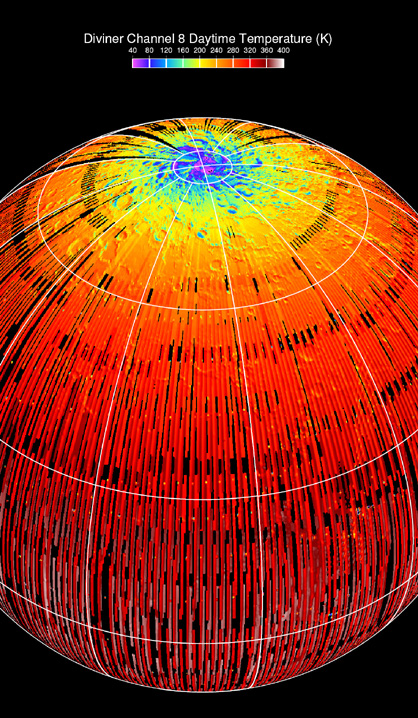

In [2]:
myimgdisplay('./teaser1.jpg')

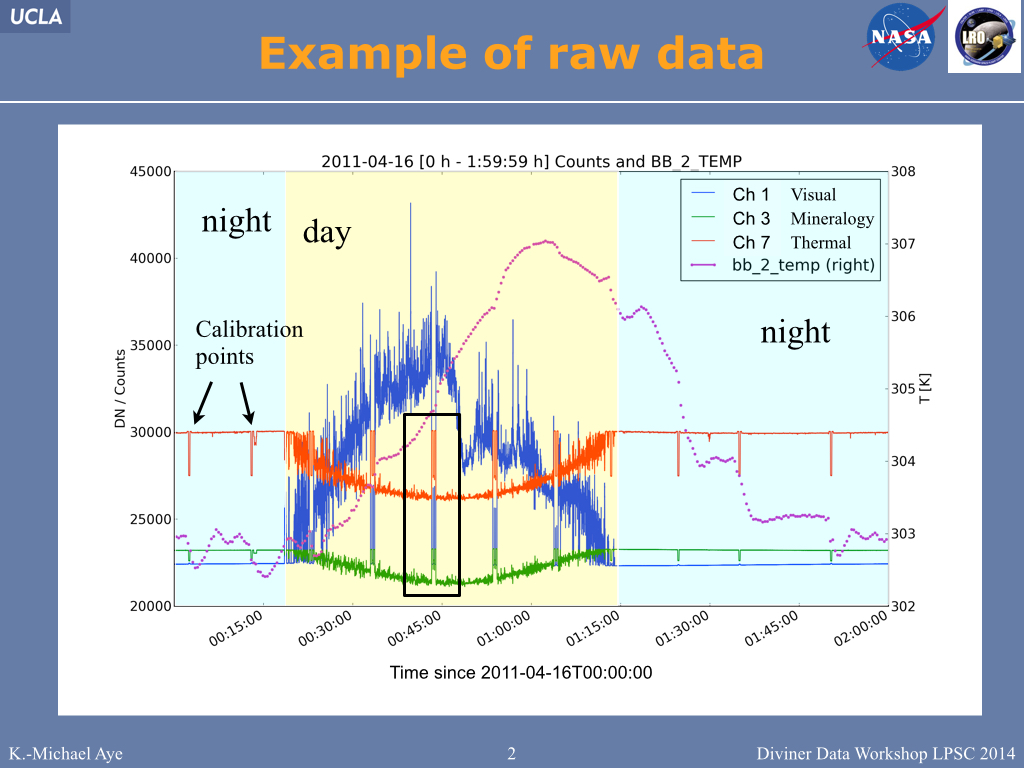

In [3]:
myimgdisplay('./Data_workshop_LPSC2014_Aye/Data_workshop_LPSC2014_Aye.001.jpg')

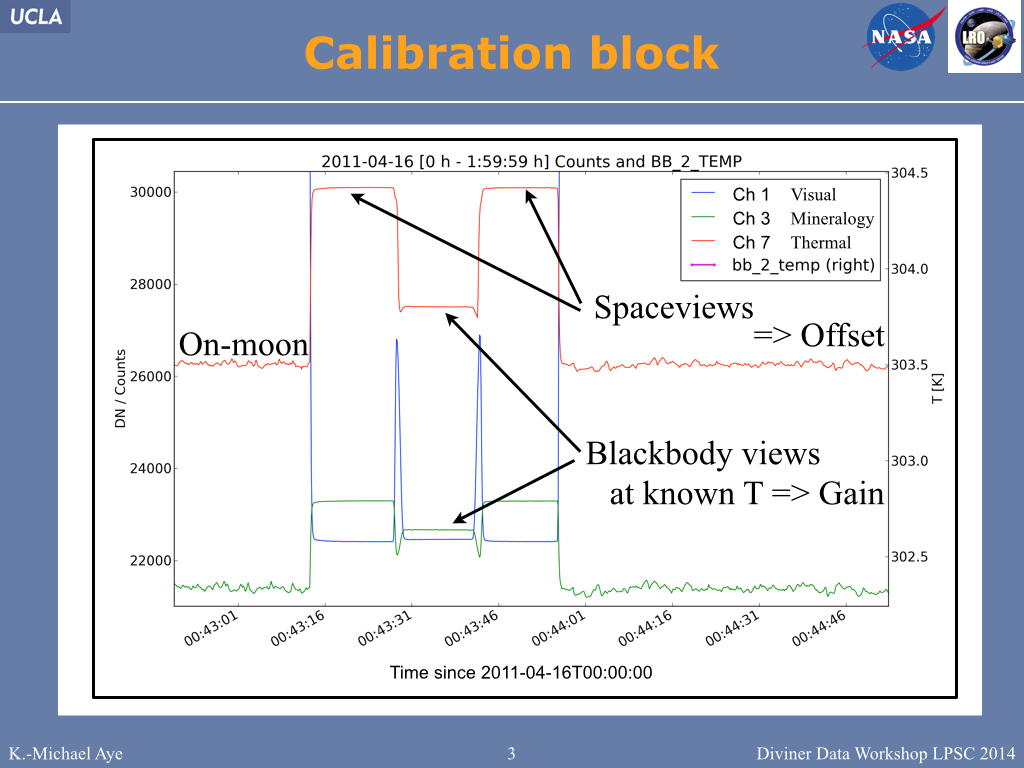

In [4]:
myimgdisplay('./Data_workshop_LPSC2014_Aye/Data_workshop_LPSC2014_Aye.002.jpg')

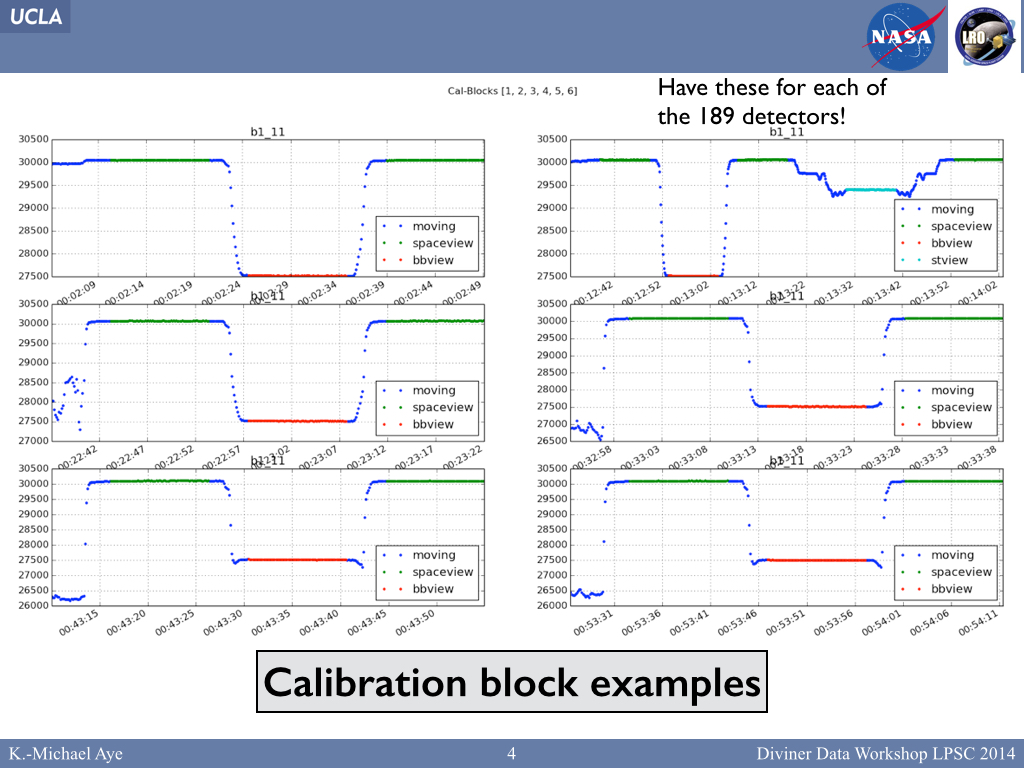

In [5]:
myimgdisplay('./Data_workshop_LPSC2014_Aye/Data_workshop_LPSC2014_Aye.003.jpg')

In [9]:
def get_sv_selector(df):
    "Create dataframe selector for pointing limits of divconstants 'c' file"
    return (df.last_az_cmd >= c.SV_AZ_MIN) & \
           (df.last_az_cmd <= c.SV_AZ_MAX) & \
           (df.last_el_cmd >= c.SV_EL_MIN) & \
           (df.last_el_cmd <= c.SV_EL_MAX)



In [ ]:
def define_sdtype(df):
    df['sdtype'] = 0
    df.loc[get_sv_selector(df), 'sdtype'] = 1
    df.loc[get_bb_selector(df), 'sdtype'] = 2
    df.loc[get_st_selector(df), 'sdtype'] = 3
    df.loc[get_stowed_selector(df), 'sdtype'] = -2
    # the following defines the sequential list of calibration blocks inside
    # the dataframe. nd.label provides an ID for each sequential part where
    # the given condition is true.
    # this still includes the moving areas, because i want the sv and bbv
    # attached to each other to deal with them later as a separate calibration
    # block
    # DECISION: block labels contain moving data as well
    # WARNING: But not all moving data is contained in block labels!
    # The end of calib block has pointing commands set to nadir.
    # below defined "is_xxx" do NOT contain moving data.
    df['calib_block_labels'] = nd.label((df.sdtype == 1) |
                                        (df.sdtype == 2) |
                                        (df.sdtype == 3))[0]


In [ ]:
    df.loc[df.moving == 1, 'sdtype'] = -1

    df['space_block_labels'] = nd.label(df.sdtype == 1)[0]
    df['bb_block_labels'] = nd.label(df.sdtype == 2)[0]
    df['st_block_labels'] = nd.label(df.sdtype == 3)[0]

    # now I don't need to check for moving anymore, the sdtypes are clean
    df['is_spaceview'] = (df.sdtype == 1)
    df['is_bbview'] = (df.sdtype == 2)
    df['is_stview'] = (df.sdtype == 3)
    df['is_moving'] = (df.sdtype == -1)
    df['is_stowed'] = (df.sdtype == -2)
    df['is_calib'] = df.is_spaceview | df.is_bbview | df.is_stview


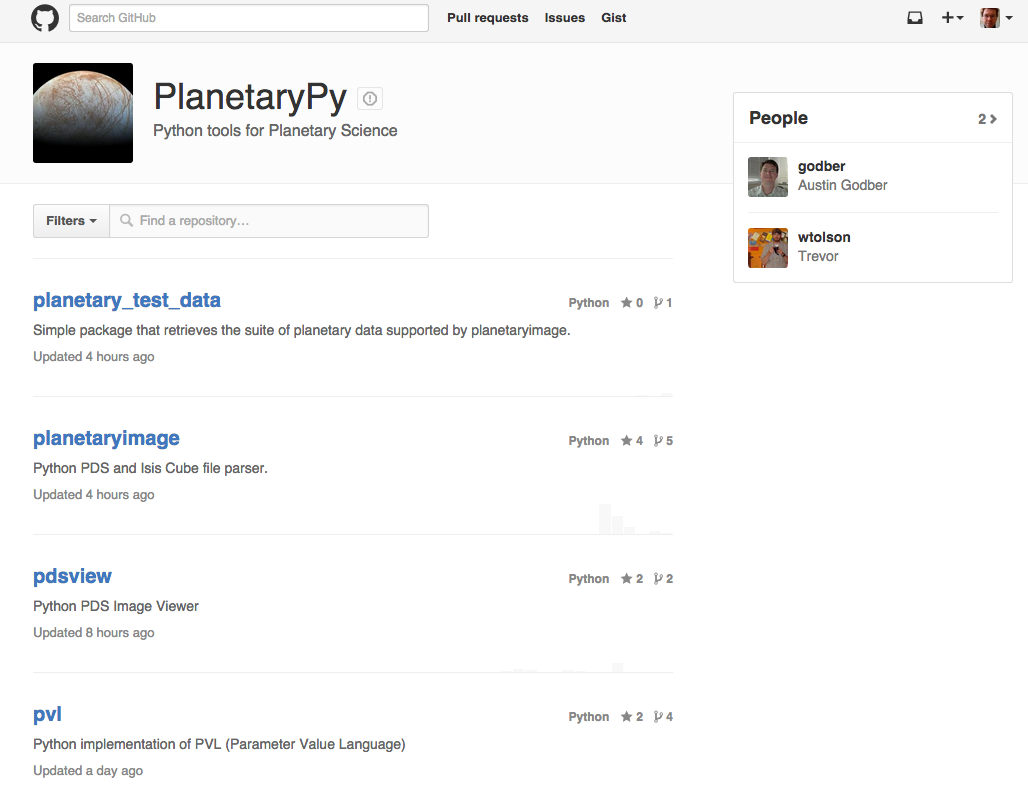

notebook available at https://github.com/michaelaye/scipy2015